# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform
import scipy.integrate as integrate
from scipy.integrate import quad
%matplotlib inline

clusters=pd.read_csv("cluster.csv") #Reading csv file
clusters.shape


(13441, 37)

# Changing Column Names

In [2]:
clusters.columns=['F275W X','F275W Y','F275W cal mag','F275W photometric RMS','F275W Quality-fit param','F275W Sharp param','F275W found','F275W well measured',
               'F336W cal mag','F336W photometric RMS','F336W Quality-fit param','F336W Sharp param','F336W found','F336W well measured',
               'F438W cal mag','F438W photometric RMS','F438W Quality-fit param','F438W Sharp param','F438W found','F438W well measured',
               'F606W cal mag','F606W photometric RMS','F606W Quality-fit param','F606W Sharp param','F606W found','F606W well measured',
               'F814W cal mag','F814W photometric RMS','F814W Quality-fit param','F814W Sharp param','F814W found','F814W well measured',
               'Membership probability','Right Ascention','Declination','Id no.','Iteration']

clusters

,F275W X,F275W Y,F275W cal mag,F275W photometric RMS,F275W Quality-fit param,F275W Sharp param,F275W found,F275W well measured,F336W cal mag,F336W photometric RMS,...,F814W photometric RMS,F814W Quality-fit param,F814W Sharp param,F814W found,F814W well measured,Membership probability,Right Ascention,Declination,Id no.,Iteration
0,4094.2563,1447.0254,-99.9999,99.9999,0.0000,9.9999,0,0,-99.9999,99.9999,...,0.0000,0.9999,-0.0052,1,1,-1.0,138.036341,-64.902491,R0000002,1.0
1,4125.7759,1467.5098,-99.9999,99.9999,0.0000,9.9999,0,0,-99.9999,99.9999,...,0.0000,0.9996,-0.0150,1,1,-1.0,138.035526,-64.902267,R0000003,1.0
2,4225.4785,1498.3099,-99.9999,99.9999,0.0000,9.9999,0,0,-99.9999,99.9999,...,0.0000,0.9999,-0.0030,1,1,-1.0,138.032947,-64.901929,R0000004,1.0
3,4290.4419,1519.3839,-99.9999,99.9999,0.0000,9.9999,0,0,-99.9999,99.9999,...,0.0000,0.9999,0.0022,1,1,-1.0,138.031266,-64.901698,R0000005,1.0
4,4285.7017,1534.7976,-99.9999,99.9999,0.0000,9.9999,0,0,-99.9999,99.9999,...,0.0000,0.9999,0.0066,1,1,-1.0,138.031389,-64.901528,R0000006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436,5562.6006,4532.3145,21.6722,0.0321,0.9960,0.0444,12,2,20.8437,0.0284,...,0.0064,0.9990,0.2420,5,2,97.8,137.998392,-64.868636,R0013474,1.0
13437,5651.9106,4531.6572,21.4812,0.0313,0.9965,-0.0933,12,2,20.6682,0.0118,...,0.0163,0.9839,-0.0771,5,2,96.8,137.996085,-64.868643,R0013475,1.0
13438,5997.1025,4531.5977,20.7290,0.0124,0.9990,-0.0228,12,3,19.8795,0.0079,...,0.0041,0.9999,0.1093,5,2,96.6,137.987167,-64.868641,R0013476,1.0
13439,6103.3579,4531.7129,21.7145,0.0219,0.9961,0.0101,12,2,20.8428,0.0137,...,99.9999,0.0000,9.9999,0,0,-1.0,137.984422,-64.868639,R0013477,1.0


In [3]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13441 entries, 0 to 13440
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F275W X                  13441 non-null  float64
 1   F275W Y                  13441 non-null  float64
 2   F275W cal mag            13441 non-null  float64
 3   F275W photometric RMS    13441 non-null  float64
 4   F275W Quality-fit param  13441 non-null  float64
 5   F275W Sharp param        13441 non-null  float64
 6   F275W found              13441 non-null  int64  
 7   F275W well measured      13441 non-null  int64  
 8   F336W cal mag            13441 non-null  float64
 9   F336W photometric RMS    13441 non-null  float64
 10  F336W Quality-fit param  13441 non-null  float64
 11  F336W Sharp param        13441 non-null  float64
 12  F336W found              13441 non-null  int64  
 13  F336W well measured      13441 non-null  int64  
 14  F438W cal mag         

In [4]:
clusters["New"]=clusters['F275W cal mag']-clusters['F336W cal mag']
# clustersF275W cal mag
df2 = clusters[['F275W cal mag','New']].copy()
df2

,F275W cal mag,New
0,-99.9999,0.0000
1,-99.9999,0.0000
2,-99.9999,0.0000
3,-99.9999,0.0000
4,-99.9999,0.0000
...,...,...
13436,21.6722,0.8285
13437,21.4812,0.8130
13438,20.7290,0.8495
13439,21.7145,0.8717


In [5]:
# from pandas.plotting import scatter_matrix 
# scatter_matrix(df2,figsize=(12,8))
# plt.title("NGC2808")
# plt.xlabel("mF275W - mF336W")
# plt.ylabel("mF275W")
# # plt.figure(figsize=(25,15))
# plt.show()

In [6]:
# df2.plot.scatter(x = 'New',y = 'F275W cal mag', s ='F275W cal mag',c='red')
# plt.show()

In [7]:
# x =[5, 7, 8, 7, 2, 17, 2, 9,
#     4, 11, 12, 9, 6]
 
# y =[99, 86, 87, 88, 100, 86,
#     103, 87, 94, 78, 77, 85, 86]
 
# plt.scatter(x, y, c ="blue")
 
# # To show the plot
# plt.show()

In [8]:
y1=df2['F275W cal mag']
x1=df2['New']

C:\Users\Hemant\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


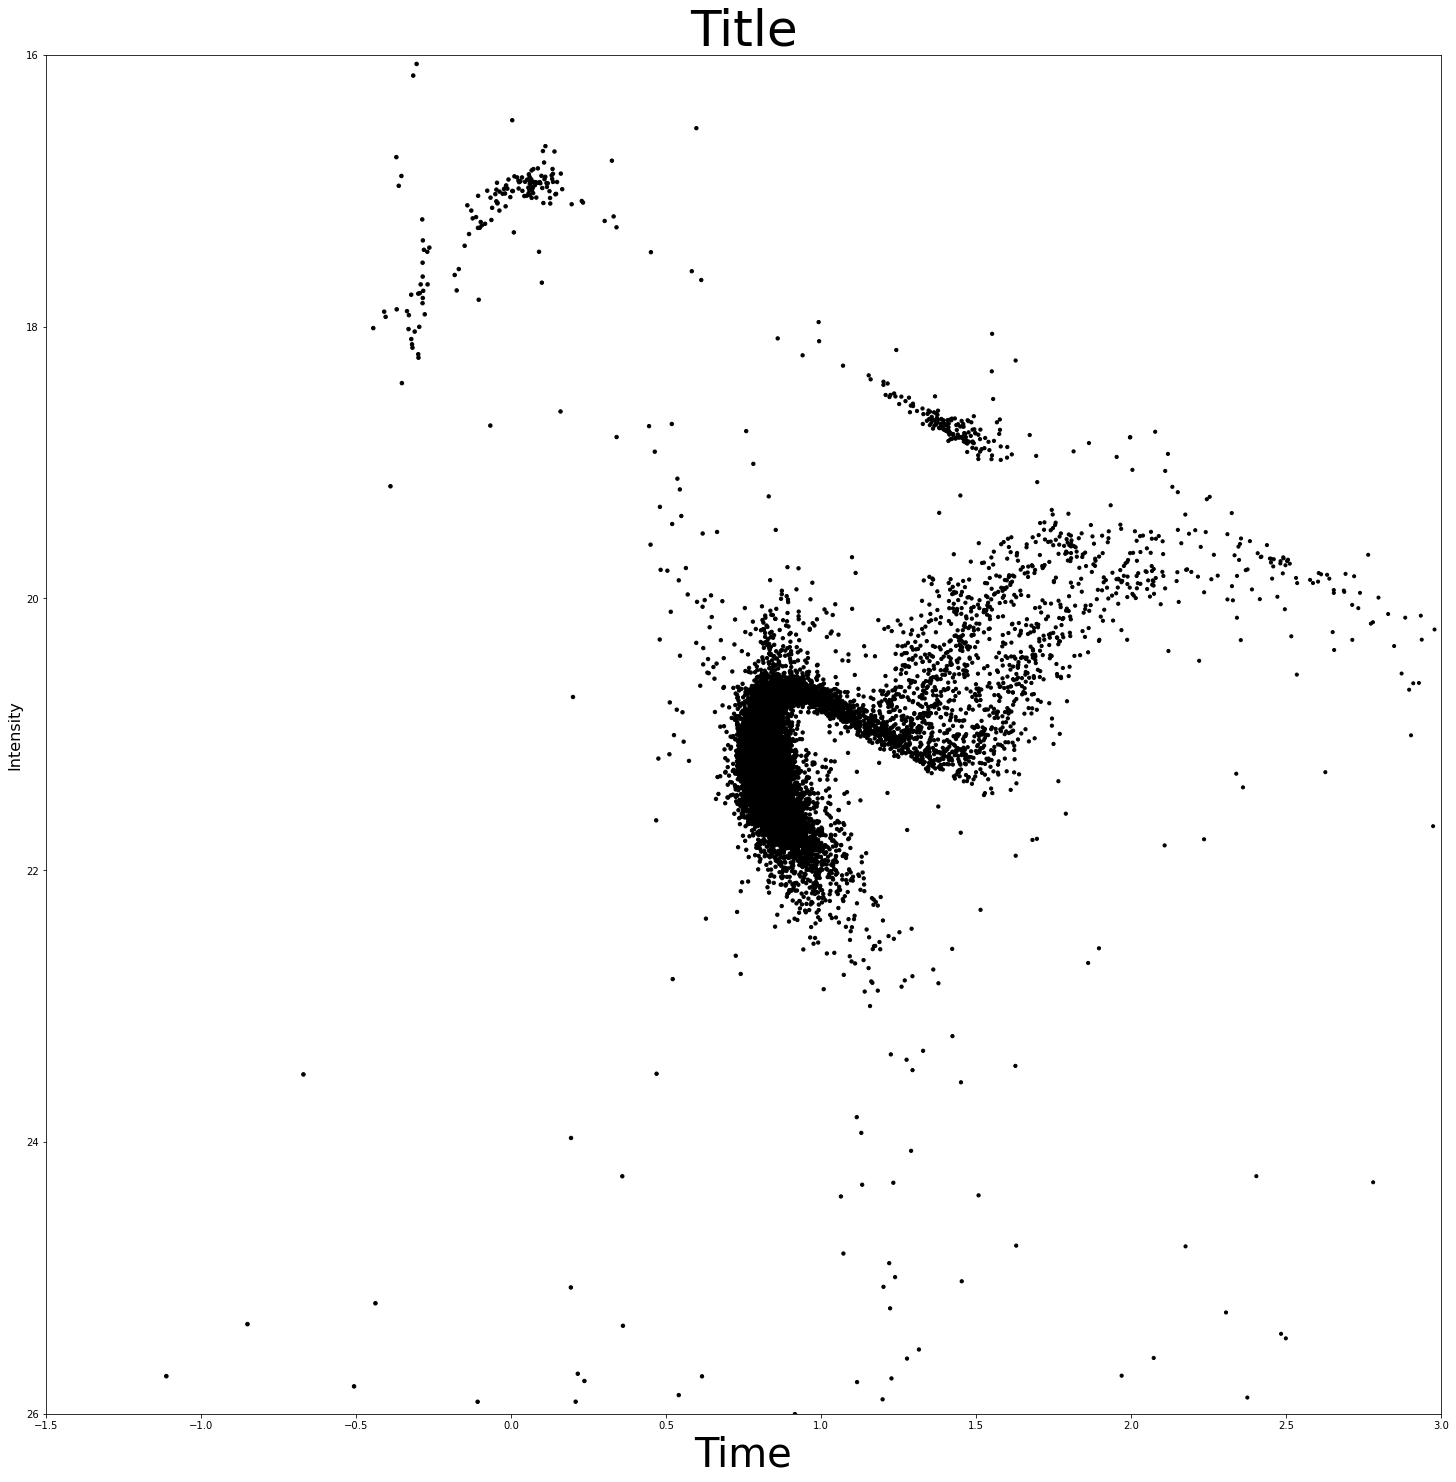

In [9]:
plt.figure(figsize=(25,25))
plt.scatter(x1, y1, c ="black",linewidths = 1,
            marker ="o",
            edgecolor ="black",
            s =12-x1)



plt.xlim(-1.5, 3)
plt.ylim(26, 16)
# plt.title("NGC2808")
# plt.xlabel("mF275W - mF336W")
# plt.ylabel("mF275W")
plt.title('Title', fontsize=50)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Intensity', fontsize=16)
plt.show()


In [10]:
x=clusters['F275W X']
y=clusters["F275W Y"]

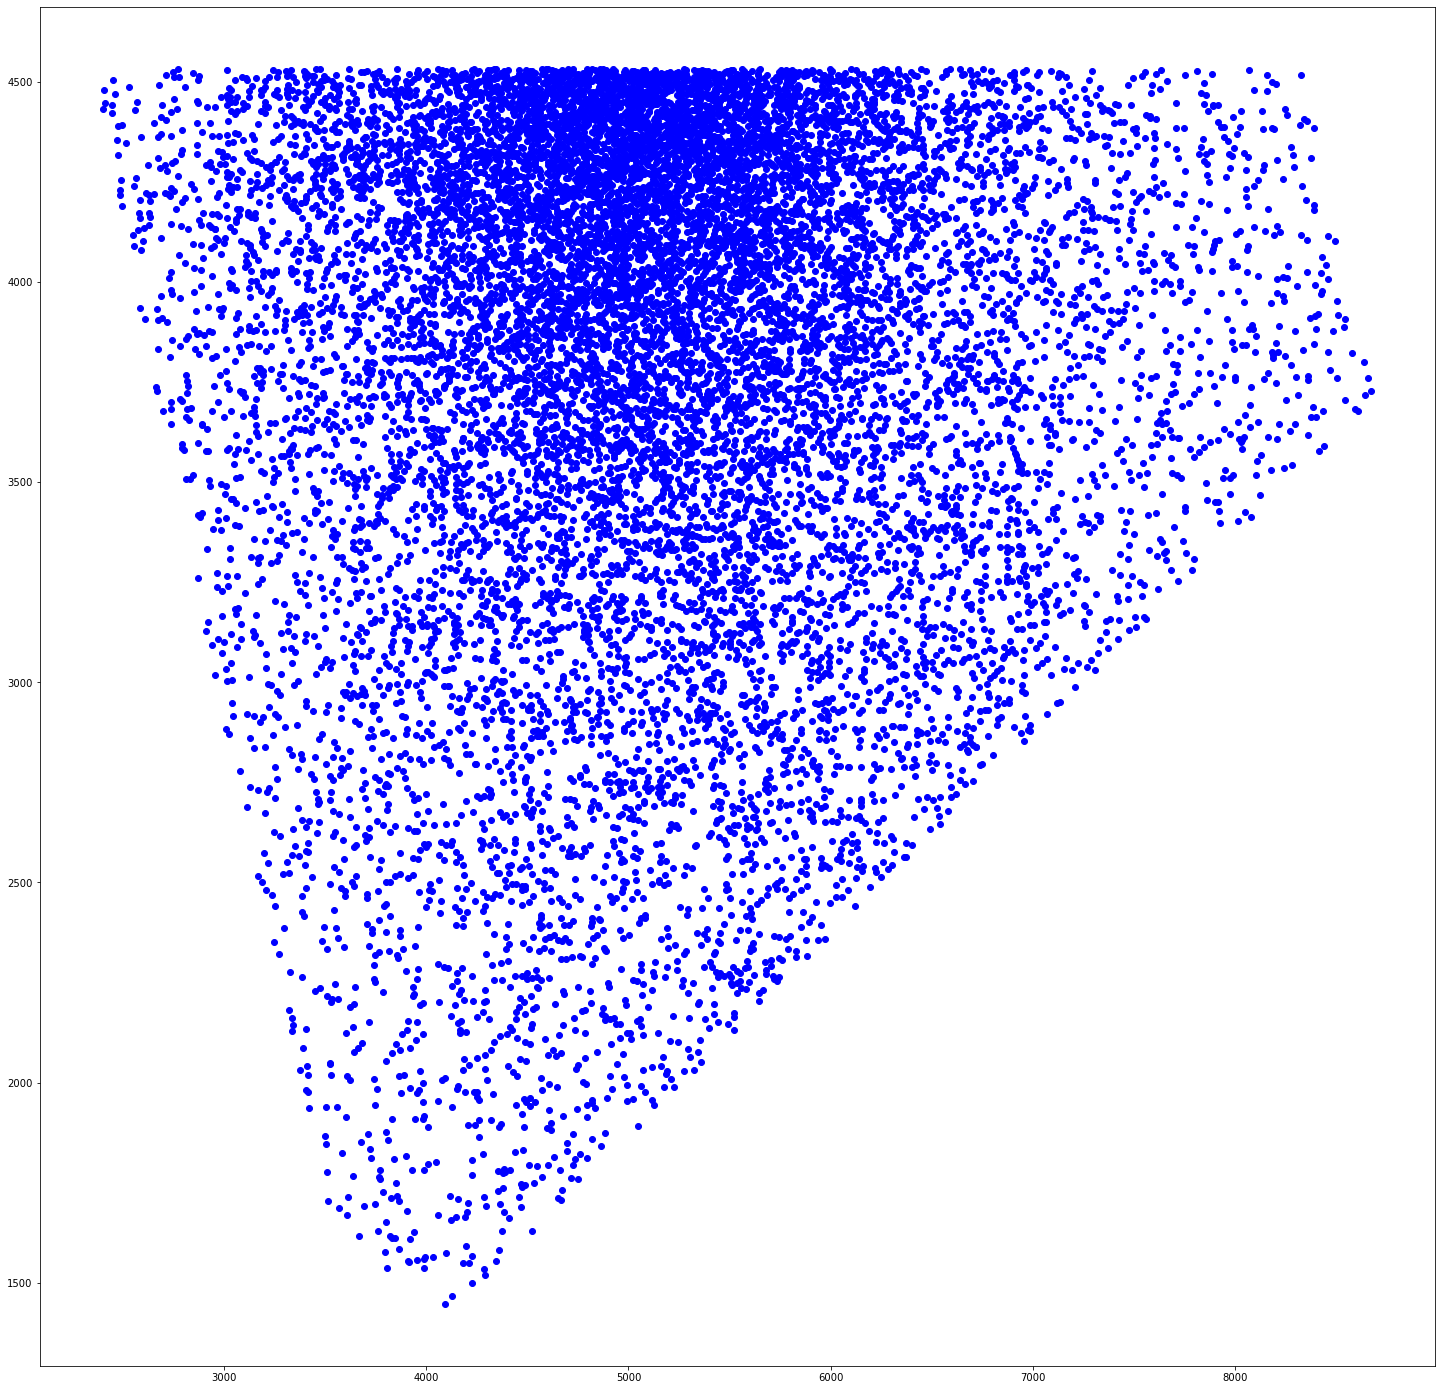

In [11]:
plt.figure(figsize=(25,25))
plt.scatter(x, y, c ="blue")


In [12]:
clusters['Membership probability','']

0        -1.0
1        -1.0
2        -1.0
3        -1.0
4        -1.0
         ... 
13436    97.8
13437    96.8
13438    96.6
13439    -1.0
13440    97.6
Name: Membership probability, Length: 13441, dtype: float64
